In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joypy
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerBase

Here I color code the before and after the FAIR principles, considering the first pubblication Wilkinson, M. D., 2016.

In [6]:
#ref: https://stackoverflow.com/questions/55501860/how-to-put-multiple-colormap-patches-in-a-matplotlib-legend

class HandlerColormap(HandlerBase):
    def __init__(self, cmap, num_stripes=8, **kw):
        HandlerBase.__init__(self, **kw)
        self.cmap = cmap
        self.num_stripes = num_stripes
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        stripes = []
        for i in range(self.num_stripes):
            s = Rectangle([xdescent + i * width / self.num_stripes, ydescent],
                          width / self.num_stripes,
                          height,
                          fc=self.cmap((2 * i + 1) / (2 * self.num_stripes)),
                          transform=trans)
            stripes.append(s)
        return stripes

cmaps = [plt.cm.Blues_r, plt.cm.Reds_r]
custom_colors = np.concatenate((cmaps[0](np.linspace(0,1,8)), cmaps[1](np.linspace(0,1,6))), axis=0)
custom_cmap = mcolors.ListedColormap(custom_colors)

In [10]:
input_file = "../data/metadata/metadata.csv"
metadata = pd.read_csv(input_file, low_memory=False)
time_df = pd.DataFrame(columns=["created_at", "commits"])
time_df["created_at"] = pd.to_datetime(metadata['created_at'], format='%Y-%m-%dT%H:%M:%SZ')
time_df["commits"] = metadata["commits_on_default"]
time_df["year"] = time_df["created_at"].apply(lambda x: x.year)
time_df["full_name"] = metadata["full_name"]

In [11]:
threshold = 95
percentiles_cutoff = np.percentile(time_df["commits"], q=threshold)
time_df_cleaned = time_df[time_df["commits"]<percentiles_cutoff]
time_df_cleaned = time_df_cleaned[~time_df_cleaned["year"].isin([2023, 2024])]

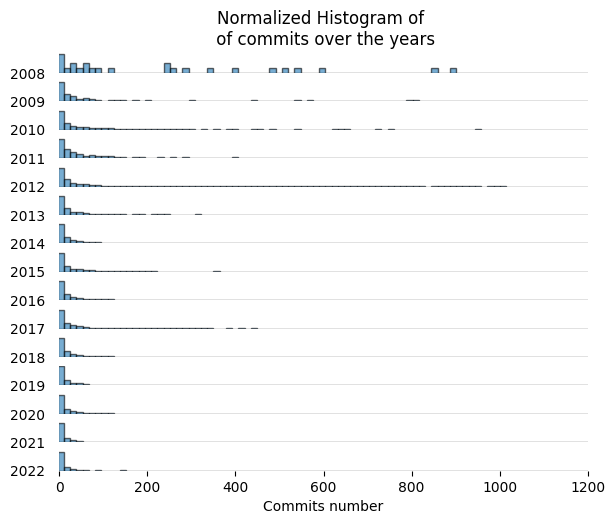

In [13]:
fig, axes = joypy.joyplot(time_df_cleaned, by="year", overlap=0, bins=100, hist=True,
                          colormap=custom_colors, alpha=0.6, ylim="own")
for a in axes:
    a.set_xlim([0,1200])
axes[-1].set_xlabel("Commits number")
axes[-1].set_title("Normalized Histogram of \n of commits over the years")

plt.savefig("../figures/hist_commits_time.png")

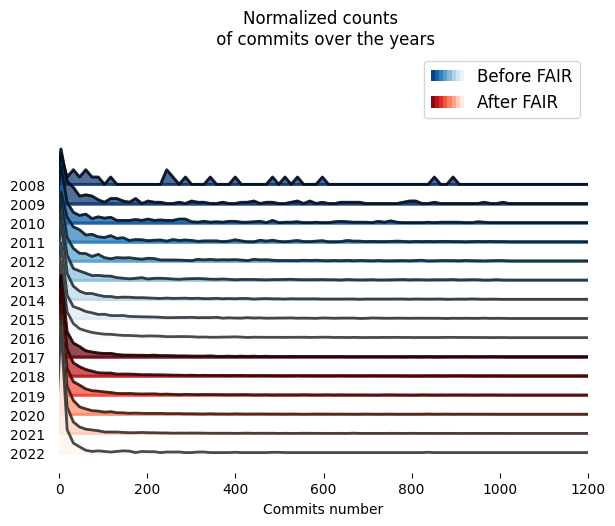

In [14]:
fig, axes = joypy.joyplot(time_df_cleaned, by="year", overlap=2, bins=100,
                          kind="normalized_counts", colormap=custom_cmap, alpha=0.7, linewidth=2)
for a in axes:
    a.set_xlim([0,1200])


cmap_labels = ["Before FAIR", "After FAIR"]
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles,
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
plt.legend(handles=cmap_handles,
           labels=cmap_labels,
           handler_map=handler_map,
           fontsize=12)

axes[-1].set_xlabel("Commits number")
axes[-1].set_title("Normalized counts \n of commits over the years")

plt.savefig("../figures/counts_commits_time.png")

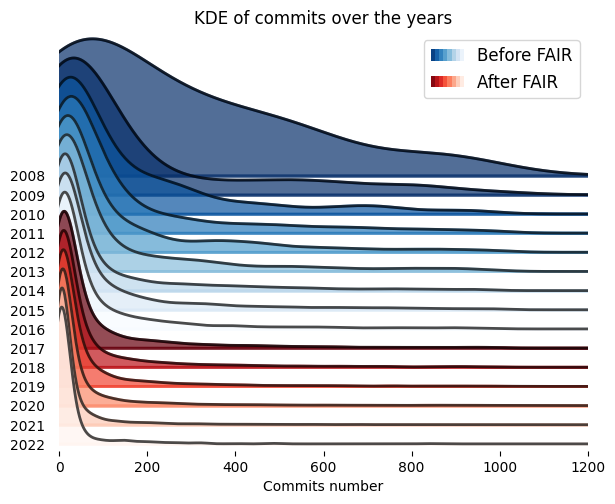

In [15]:

fig, axes = joypy.joyplot(time_df_cleaned, by="year", overlap=2, bins=200, ylim="own",
                           colormap=custom_cmap, alpha=0.7, linewidth=2)

cmap_labels = ["Before FAIR", "After FAIR"]
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles,
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
plt.legend(handles=cmap_handles,
           labels=cmap_labels,
           handler_map=handler_map,
           fontsize=12)

for a in axes:
    a.set_xlim([0,1200])
axes[-1].set_xlabel("Commits number")
axes[-1].set_title("KDE of commits over the years")
plt.savefig("../figures/KDE_commits_time.png")